# 💉 Heart Disease Classification Project

In [1]:
#Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Load the Dataset

In [2]:
churn_df = pd.read_csv("16325569497737558.csv")
churn_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# 📊 Feature Description:
# - age: Age of the patient
# - sex: Gender (1 = male, 0 = female)
# - exang: Exercise-induced angina (1 = Yes, 0 = No)
# - ca: Number of major vessels (0–3) colored by fluoroscopy
# - cp: Chest pain type (1–4)
# - trtbps: Resting blood pressure (mm Hg)
# - chol: Serum cholesterol in mg/dl
# - fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
# - restecg: Resting ECG results (0–2)
# - thalach: Maximum heart rate achieved
# - target: 0 = Low chance of heart disease, 1 = High chance

In [16]:
output_df = output_df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg',   'thalachh', 'exng','oldpeak','slp','caa','thall','output']]
output_df['output'] = churn_df['output'].astype('int')
output_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
X = np.asarray(output_df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg',   'thalachh', 'exng','oldpeak','slp','caa','thall']])
X[0:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [18]:
y = np.asarray(output_df['output'])
y [0:5]

array([1, 1, 1, 1, 1])

In [19]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
         2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
        -2.27457861, -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, -0.09273778,  0.07219949,
        -0.41763453,  0.89896224,  1.63347147, -0.69663055,  2.12257273,
        -2.27457861, -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, -0.09273778, -0.81677269,
        -0.41763453, -1.00583187,  0.97751389, -0.69663055,  0.31091206,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.18017482,  0.68100522,  0.03203122, -0.66386682, -0.19835726,
        -0.41763453,  0.89896224,  1.23989692, -0.69663055, -0.20670527,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.29046364, -1.46841752, -0.93851463, -0.66386682,  2.08204965,
        -0.41763453,  0.89896224,  0.58393935,  1.43548113, -0.37924438,
         0.97635214, -0.71442887, -0.51292188]])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [22]:
yhat = LR.predict(X_test)
print(yhat)
print(y_test)

[1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1
 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1]
[1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1
 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1]


In [23]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.37631007, 0.62368993],
       [0.72008853, 0.27991147],
       [0.40239548, 0.59760452],
       [0.19110398, 0.80889602],
       [0.40269454, 0.59730546],
       [0.5020939 , 0.4979061 ],
       [0.63153146, 0.36846854],
       [0.23317107, 0.76682893],
       [0.49337482, 0.50662518],
       [0.36550033, 0.63449967],
       [0.4291565 , 0.5708435 ],
       [0.20223981, 0.79776019],
       [0.39380703, 0.60619297],
       [0.56885837, 0.43114163],
       [0.33174526, 0.66825474],
       [0.86267505, 0.13732495],
       [0.29399232, 0.70600768],
       [0.29111268, 0.70888732],
       [0.6773343 , 0.3226657 ],
       [0.45853907, 0.54146093],
       [0.24193055, 0.75806945],
       [0.3911356 , 0.6088644 ],
       [0.80506229, 0.19493771],
       [0.46215773, 0.53784227],
       [0.45177731, 0.54822269],
       [0.75409356, 0.24590644],
       [0.58954187, 0.41045813],
       [0.22639078, 0.77360922],
       [0.43524412, 0.56475588],
       [0.80517928, 0.19482072],
       [0.

In [24]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.75

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[33  3]
 [ 4 21]]


Confusion matrix, without normalization
[[33  3]
 [ 4 21]]


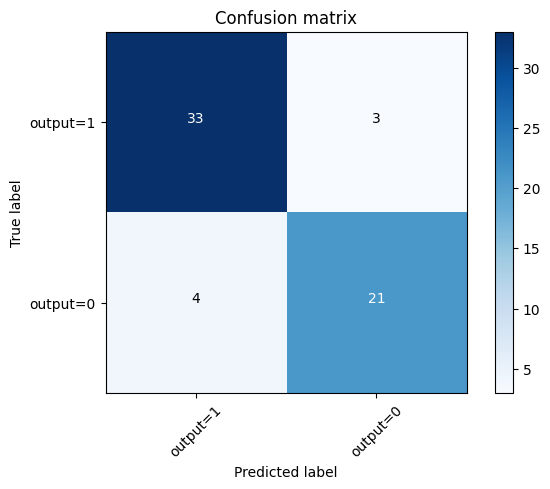

In [27]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output=1','output=0'],normalize= False,  title='Confusion matrix')

In [28]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.89      0.92      0.90        36

    accuracy                           0.89        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.88      0.89      0.88        61



In [29]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.4363789674264379